In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### EDA and Data Cleansing

In [2]:
#Reading Data File

data = pd.read_csv("transaction_data.csv")
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [3]:
#Functiom to explore Data

def eda(attribute):
    return [attribute.count(), len(attribute.unique()), len(attribute[attribute == -1])]

In [4]:
#EDA

stats = {'UserId': eda(data['UserId']), 
         'TransactionId': eda(data['TransactionId']), 
         'ItemCode': eda(data['ItemCode']), 
         'ItemDescription': eda(data['ItemDescription'])}

stats_table = pd.DataFrame(stats, index = ['Count', 'Unique values', "Unspecified (-1)"])
print(stats_table)

                   UserId  TransactionId  ItemCode  ItemDescription
Count             1083818        1083818   1083818          1080910
Unique values        4373          25900      3407             4224
Unspecified (-1)   270160              0      5592                0


<Figure size 432x288 with 0 Axes>

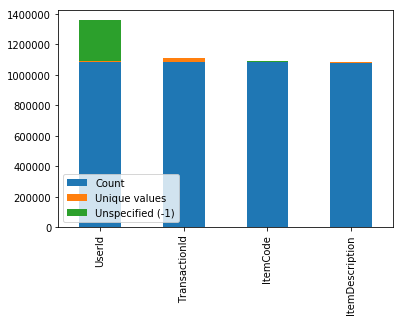

In [5]:
plt.figure()
stats_table.T.plot(kind = "bar", stacked = True)
#plt.savefig('1.jpg')

In [6]:
#Slicing irrevant entries

negative_cost_per_item = data[data.CostPerItem < 0]

negative_NumOfItemsPurchased_zerocost = data.loc[ data[(data['NumberOfItemsPurchased'] < 0) & (data['CostPerItem'] == 0)].index , :]

returned_items = data.loc[ data[(data['NumberOfItemsPurchased'] < 0) & (data['CostPerItem'] > 0)].index , :]

free_items = data.loc[ data[(data['CostPerItem'] == 0) & (data['NumberOfItemsPurchased'] > 0)].index , :]

irrelevant_transactions = data.loc[ data[(data['NumberOfItemsPurchased'] > 0) & (data['CostPerItem'] > 0) & (data['ItemCode'] == -1)].index , :]

In [7]:
print ("\n\nTransactions with negative cost per item = ", len(negative_cost_per_item), "\n")
print ("No. of items returned = ", len(returned_items), '\n')
print ("No. of items given free = ", len(free_items), '\n')
print ("\nTransactions with negative no. of items purchased and zero cost = ", len(negative_NumOfItemsPurchased_zerocost))
print ("\nItem description of such transactions include \n", list(set(negative_NumOfItemsPurchased_zerocost["ItemDescription"])), '\n')
print ("...these can be discarded")

print ("\n\n\nNo. of valid transactions but unspecified item code (irrelevant) = ", len(irrelevant_transactions))
print ('\nwhich include ', list(set(irrelevant_transactions["ItemDescription"])), "\n...which can be discarded")



Transactions with negative cost per item =  4 

No. of items returned =  18576 

No. of items given free =  2358 


Transactions with negative no. of items purchased and zero cost =  2672

Item description of such transactions include 
 [nan, 'wet boxes', 'wet rusty', 'damages/display', 'wrong barcode (22467)', 'taig adjust no stock', 'incorrect stock entry.', 'wrong barcode', 'mixed up', 'wet', 'missing?', 'Dotcom', '?', 'wet/rusty', '? sold as sets?', 'mouldy, thrown away.', '????missing', 'lost', 'thrown away', 'damages/dotcom?', 'POSSIBLE DAMAGES OR LOST?', 'damages?', 'Display', 'sold as set by dotcom', 'reverse previous adjustment', 'wrongly coded 20713', 'Damages/samples', 'sold in set?', 'adjust', 'Dagamed', 'temp adjustment', 'Thrown away-rusty', 'water damage', 'missing', 'Sold as 1 on dotcom', 'dotcom sold sets', 'wet?', '?? missing', 'crushed', 'Incorrect stock entry.', 'CHECK', 'mix up with c', 'DAMAGED', 'sold with wrong barcode', '?sold as sets?', 'counted', 'mystery! 

In [8]:
#Deleting irrelevant entries

data = data.drop(negative_cost_per_item.index)
data = data.drop(negative_NumOfItemsPurchased_zerocost.index)
data = data.drop(returned_items.index)
data = data.drop(free_items.index)
data = data.drop(irrelevant_transactions.index)

In [9]:
#EDA after cleansing

stats = {'UserId': eda(data['UserId']), 
         'TransactionId': eda(data['TransactionId']), 
         'ItemCode': eda(data['ItemCode']), 
         'ItemDescription': eda(data['ItemDescription'])}


stats_table = pd.DataFrame(stats, index = ['Count', 'Unique values', "Unspecified (-1)"])
stats_table


,UserId,TransactionId,ItemCode,ItemDescription
Count,1055812,1055812,1055812,1055812
Unique values,4335,19776,3293,4016
Unspecified (-1),262872,0,0,0


<Figure size 432x288 with 0 Axes>

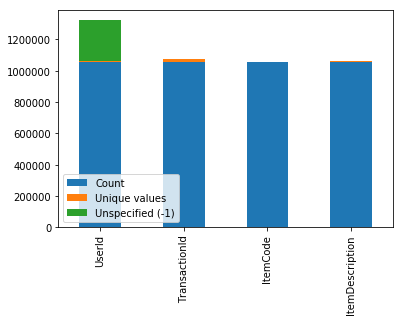

In [10]:
plt.figure()
stats_table.T.plot(kind = "bar", stacked = True)

### Feature Engineering

In [11]:
#Extracting relevant attributes and deleting Duplicates

#For Market Basket Analysis, only the instances of a product's transaction are required
#Thus, the transacion ids are the samples and the product ids are the features

data_reduced = data.iloc[:, 1:4].drop('TransactionTime', axis = 1)
data_reduced = pd.DataFrame(data_reduced.drop_duplicates().to_dict("records"))
print(data_reduced.head())

   ItemCode  TransactionId
0    465549        6355745
1    482370        6283376
2    490728        6385599
3    459186        6044973
4   1733592        6143225


In [12]:
#Stats of feature table

stats = {'TransactionId': eda(data_reduced['TransactionId']), 
         'ItemCode': eda(data_reduced['ItemCode'])}
         
stats_table = pd.DataFrame(stats, index = ['Count', 'Unique values', "Unspecified (-1)"])
stats_table

,TransactionId,ItemCode
Count,505633,505633
Unique values,19776,3293
Unspecified (-1),0,0


In [13]:
product_list = list(set(data_reduced['ItemCode']))
transactions_list = list(set(data_reduced['TransactionId']))

In [14]:
#creating feature table
#In every transaction(row), cells corresponding to products that were purchased will be marked 1, else 0

df = pd.DataFrame(0,index=transactions_list,columns=product_list)

for i in range(len(data_reduced)):
        df.at[data_reduced.iloc[i, 1], data_reduced.iloc[i, 0]] = 1

In [15]:
df.head()

,1892352,491526,483336,475146,466956,1662990,458766,450576,360465,786450,...,1785840,491505,483315,999411,475125,458745,450555,360444,786429,434175
6160385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160451,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6160462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Finding Support of each element
#Support is the fraction of no. of occurences of a purchase out of total transactions

#Support = P(A) = n(A)/N

support = df.sum(axis = 0, skipna = True) /len(transactions_list)
support = support.sort_values()
support.iloc[-15:]    #Top 15 products with highest support

471849     0.060730
470106     0.061590
487263     0.062247
471597     0.063157
435267     0.064371
470043     0.064927
445452     0.066748
477120     0.070034
466137     0.070388
1782459    0.073574
435225     0.079136
998886     0.098503
470883     0.100526
1787583    0.114533
1787079    0.134153
dtype: float64

In [21]:
#Filtering out products with a minimum support of 0.01

indexes = list(support[support>=0.01].index)
reduced_df = df.loc[:, indexes]
zero_rows = list(reduced_df[reduced_df.sum(axis = 1, skipna = True)!=0].index)
print("No. of products with support less than zero:", len(zero_rows))

No. of products with support less than zero: 19074


In [22]:
reduced_df = reduced_df.loc[zero_rows, :]

In [23]:
new_support = reduced_df.sum(axis = 0, skipna = True)/reduced_df.shape[0]

### Mining Association Rules by calculation pairwise "Lift"

In [24]:
dfa = reduced_df.to_numpy()
dot_product = pd.DataFrame(0,index=indexes,columns=indexes)

In [25]:
dot_product.head()

,475356,458472,489027,471765,474453,442428,435771,457863,455700,482076,...,470043,445452,477120,466137,1782459,435225,998886,470883,1787583,1787079
475356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Calculating Support of pairwise product transaction

for i in range(dfa.shape[1]):
    
    for j in range(i, dfa.shape[1]):
        
        dot_product.iloc[i, j] = np.dot(dfa[:,i], dfa[:,j])/dfa.shape[0]
        dot_product.iloc[j, i] = dot_product.iloc[i, j]

In [27]:
#Support Matrix
#where aij = P(A&B) = n(A&B)/N = (n(A).n(B))/N

dot_product.head()

,475356,458472,489027,471765,474453,442428,435771,457863,455700,482076,...,470043,445452,477120,466137,1782459,435225,998886,470883,1787583,1787079
475356,0.010381,0.000472,0.000524,0.000315,0.000472,0.000315,0.000262,0.000262,0.000157,0.000210,...,0.000944,0.001416,0.000944,0.001416,0.000839,0.001573,0.001311,0.002517,0.001049,0.001625
458472,0.000472,0.010381,0.000629,0.000682,0.001416,0.000996,0.000419,0.001678,0.000524,0.000419,...,0.002202,0.002988,0.002569,0.003984,0.001049,0.003198,0.002254,0.002936,0.002988,0.004247
489027,0.000524,0.000629,0.010381,0.000524,0.000629,0.000262,0.000262,0.000839,0.000210,0.000524,...,0.002150,0.002884,0.002831,0.002464,0.001153,0.002726,0.002884,0.001678,0.002254,0.004194
471765,0.000315,0.000682,0.000524,0.010381,0.000891,0.000367,0.000315,0.000891,0.000105,0.000315,...,0.001416,0.002569,0.001730,0.001835,0.001730,0.002097,0.002412,0.002517,0.003827,0.002726
474453,0.000472,0.001416,0.000629,0.000891,0.010381,0.000524,0.000524,0.002307,0.000262,0.000577,...,0.002150,0.003198,0.002621,0.003513,0.001416,0.003041,0.001940,0.003303,0.003460,0.003617


In [28]:
# Calculating Lift 

#Lift = P(A&B)/(P(A)*P(B))

lift = pd.DataFrame(0,index=indexes,columns=indexes)

for i in range(dfa.shape[1]):
    
    lift.iloc[i,:] = dot_product.iloc[i,:]/dot_product.iloc[i,i]
    lift.iloc[:,i] = dot_product.iloc[:,i]/dot_product.iloc[i,i]
           

In [29]:
lift.head()

,475356,458472,489027,471765,474453,442428,435771,457863,455700,482076,...,470043,445452,477120,466137,1782459,435225,998886,470883,1787583,1787079
475356,1.000000,0.045455,0.050505,0.030303,0.045455,0.030303,0.025253,0.025253,0.015152,0.020202,...,0.014019,0.020455,0.012996,0.019397,0.010997,0.019169,0.012834,0.024145,0.008830,0.011685
458472,0.045455,1.000000,0.060606,0.065657,0.136364,0.095960,0.040404,0.161616,0.050505,0.040404,...,0.032710,0.043182,0.035379,0.054598,0.013746,0.038978,0.022074,0.028169,0.025166,0.030531
489027,0.050505,0.060606,1.000000,0.050505,0.060606,0.025253,0.025253,0.080808,0.020202,0.050505,...,0.031931,0.041667,0.038989,0.033764,0.015120,0.033227,0.028234,0.016097,0.018985,0.030155
471765,0.030303,0.065657,0.050505,1.000000,0.085859,0.035354,0.030303,0.085859,0.010101,0.030303,...,0.021028,0.037121,0.023827,0.025144,0.022680,0.025559,0.023614,0.024145,0.032230,0.019600
474453,0.045455,0.136364,0.060606,0.085859,1.000000,0.050505,0.050505,0.222222,0.025253,0.055556,...,0.031931,0.046212,0.036101,0.048132,0.018557,0.037061,0.018994,0.031690,0.029139,0.026008


In [30]:
#Generating Output

op = pd.DataFrame(index = indexes, columns=['Most_likely', 'Second_Most_likely', 'Third_Most_likely'])

Most_likely=[]
Second_Most_likely=[]
Third_Most_likely=[]

for colss in lift.columns:
    
    temp = lift.nlargest(4,colss).index.to_list()
                
    op.loc[colss, 'Most_likely'] = list(temp)[1]
    op.loc[colss, 'Second_Most_likely'] = list(temp)[2]
    op.loc[colss, 'Third_Most_likely'] = list(temp)[3]
        
op

,Most_likely,Second_Most_likely,Third_Most_likely
475356,475314,471261,489132
458472,470862,1764651,470799
489027,489006,489132,489090
471765,471744,470862,477834
474453,474033,474054,474621
442428,459291,1787751,1764651
435771,435834,1784349,441252
457863,435393,1787751,1785819
455700,441693,445578,469518
482076,479094,999453,456036


##### Comparing the result with rules obtained using Correlation as a metric

In [31]:
correlation = reduced_df.corr()

In [32]:
correlation.head()

,475356,458472,489027,471765,474453,442428,435771,457863,455700,482076,...,470043,445452,477120,466137,1782459,435225,998886,470883,1787583,1787079
475356,1.000000,0.035442,0.040545,0.020131,0.035442,0.020131,0.015028,0.015028,0.004821,0.009924,...,0.009643,0.027101,0.007221,0.024959,0.001746,0.025924,0.008163,0.046323,-0.005616,0.005172
458472,0.035442,1.000000,0.050752,0.055856,0.127305,0.086477,0.030338,0.152822,0.040545,0.030338,...,0.059188,0.088244,0.069014,0.122405,0.009541,0.084353,0.038910,0.059866,0.053547,0.079913
489027,0.040545,0.050752,1.000000,0.040545,0.050752,0.015028,0.015028,0.071166,0.009924,0.040545,...,0.057123,0.084167,0.078981,0.064732,0.013438,0.067390,0.059408,0.019237,0.031161,0.078418
471765,0.020131,0.055856,0.040545,1.000000,0.076270,0.025235,0.020131,0.076270,-0.000283,0.020131,...,0.028222,0.071939,0.037121,0.040868,0.034873,0.044772,0.044034,0.046323,0.079131,0.036563
474453,0.035442,0.127305,0.050752,0.076270,1.000000,0.040545,0.040545,0.214064,0.015028,0.045649,...,0.057123,0.096396,0.071008,0.104506,0.023181,0.078699,0.028661,0.071716,0.067938,0.061975


In [36]:
opc = pd.DataFrame(index = indexes, columns=['Most_likely', 'Second_Most_likely', 'Third_Most_likely'])

Most_likely=[]
Second_Most_likely=[]
Third_Most_likely=[]

for colss in correlation.columns:
    
    temp = correlation.nlargest(4,colss).index.to_list()
                
    opc.loc[colss, 'Most_likely'] = list(temp)[1]
    opc.loc[colss, 'Second_Most_likely'] = list(temp)[2]
    opc.loc[colss, 'Third_Most_likely'] = list(temp)[3]
opc

,Most_likely,Second_Most_likely,Third_Most_likely
475356,475314,473676,475251
458472,470862,451374,470799
489027,489006,489447,489132
471765,471744,478464,1785819
474453,474495,474033,474054
442428,459291,1787751,459417
435771,435834,466137,461790
457863,1787751,1764672,1785819
455700,434931,445578,441693
482076,470757,482181,481971


#### Calculating percentage similarity between the results of the two metrics

In [40]:
#Calculating percentage similarity between the results of the two metrics
print("No of matching predictions:", np.count_nonzero(opc.to_numpy()[:,:]-op.to_numpy()[:,:] == 0))
print("Percentage match = ", np.count_nonzero(opc.to_numpy()[:,:]-op.to_numpy()[:,:] == 0)/(825*3))
      


No of matching predictions: 1248
Percentage match =  0.5042424242424243
